Load a galaxy halo from Illustris (similar to create_rubix_data.ipynb)

In [42]:
# NBVAL_SKIP
import os

config = {
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 14,
        "reuse": True,
        }
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-14.hdf5",
        },
    },
    "output_path": "output",

        
}

# NBVAL_SKIP
from rubix.core.data import convert_to_rubix

# NBVAL_SKIP
convert_to_rubix(config)

# NBVAL_SKIP
from rubix.utils import print_hdf5_file_structure

print(print_hdf5_file_structure("output/rubix_galaxy.h5"))


# NBVAL_SKIP
from rubix.utils import load_galaxy_data

galaxy, units = load_galaxy_data("output/rubix_galaxy.h5")

2024-05-08 00:37:58,842 - rubix - DEBUG - Loading data from Illustris file..
2024-05-08 00:37:58,882 - rubix - DEBUG - Converting Stellar Formation Time to Age


2024-05-08 00:38:04,368 - rubix - DEBUG - Converting to Rubix format..
2024-05-08 00:38:04,385 - rubix - DEBUG - Converting redshift for galaxy data into 
2024-05-08 00:38:04,387 - rubix - DEBUG - Converting center for galaxy data into kpc
2024-05-08 00:38:04,389 - rubix - DEBUG - Converting halfmassrad_stars for galaxy data into kpc
2024-05-08 00:38:04,390 - rubix - DEBUG - Converting coords for particle type stars into kpc
2024-05-08 00:38:04,406 - rubix - DEBUG - Converting mass for particle type stars into Msun
2024-05-08 00:38:04,425 - rubix - DEBUG - Converting metallicity for particle type stars into 
2024-05-08 00:38:04,431 - rubix - DEBUG - Converting age for particle type stars into Gyr
2024-05-08 00:38:04,441 - rubix - DEBUG - Converting velocity for particle type stars into kpc/s
2024-05-08 00:38:04,476 - rubix - INFO - Rubix file saved at output/rubix_galaxy.h5


File: output/rubix_galaxy.h5
Group: galaxy
    Dataset: center (float64) ((3,))
    Dataset: halfmassrad_stars (float64) (())
    Dataset: redshift (float64) (())
Group: meta
    Dataset: BoxSize (float64) (())
    Dataset: CutoutID (int64) (())
    Dataset: CutoutRequest (object) (())
    Dataset: CutoutType (object) (())
    Dataset: Git_commit (|S40) (())
    Dataset: Git_date (|S29) (())
    Dataset: HubbleParam (float64) (())
    Dataset: MassTable (float64) ((6,))
    Dataset: NumFilesPerSnapshot (int64) (())
    Dataset: NumPart_ThisFile (int32) ((6,))
    Dataset: Omega0 (float64) (())
    Dataset: OmegaBaryon (float64) (())
    Dataset: OmegaLambda (float64) (())
    Dataset: Redshift (float64) (())
    Dataset: SimulationName (object) (())
    Dataset: SnapshotNumber (int64) (())
    Dataset: Time (float64) (())
    Dataset: UnitLength_in_cm (float64) (())
    Dataset: UnitMass_in_g (float64) (())
    Dataset: UnitVelocity_in_cm_per_s (float64) (())
Group: particles
    Group

Get from the loaded galaxy the data we need to rotate the galaxy

In [43]:
galaxycenter =galaxy['subhalo_center']
halfmassradius = galaxy["subhalo_halfmassrad_stars"]
mass_s = galaxy['particle_data']['stars']['mass']
pos_s = galaxy['particle_data']['stars']['coords']
vel_s = galaxy['particle_data']['stars']['velocity']

Center galaxy coordinates and velocities

In [44]:
from rubix.galaxy.alignment import center_particles

pos_s, vel_s = center_particles(pos_s, vel_s, galaxycenter)

Load function to orientate galaxy. The galaxy is loaded edge-on.


alpha is the rotation around the x-axis.

beta is the rotation around the y-axis.

gamma is the rotation around the z-axis.


To turn a galaxy regarding the inclination, you have to rotate around the y-axis, setting betta=inclination. 0 is edge-on and 90 is face-on.

In [55]:
from rubix.galaxy_rotation.factory import GalaxyRotationFactory

alpha = 0
beta = 0
gamma = 0

pos, vel = GalaxyRotationFactory(pos_s, vel_s, mass_s, halfmassradius, alpha, beta, gamma)

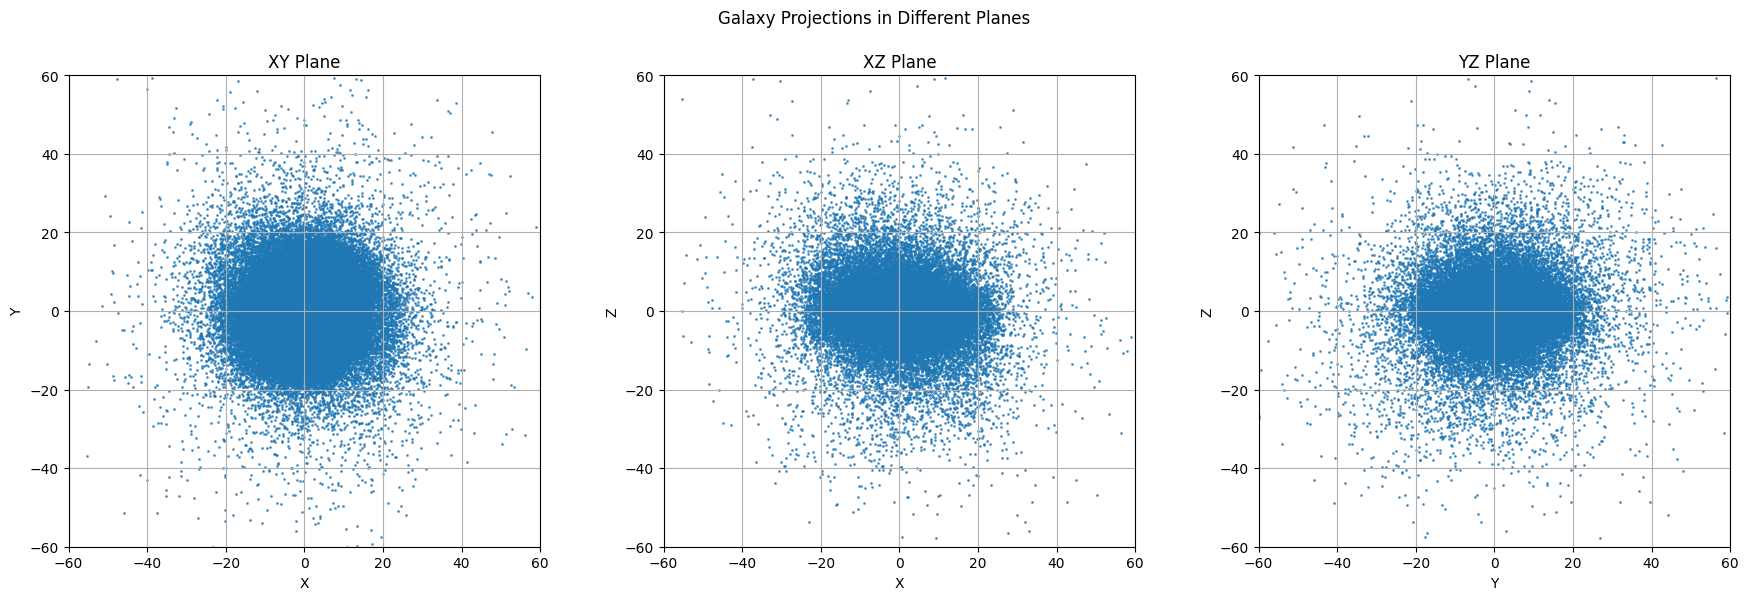

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting X, Y, and Z coordinates
x_coords = pos[:, 0]
y_coords = pos[:, 1]
z_coords = pos[:, 2]

# Set up figure for multiple subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Galaxy Projections in Different Planes')

# XY plane
axs[0].scatter(x_coords, y_coords, s=1, alpha=0.7)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('XY Plane')
axs[0].set_aspect('equal', 'box')
axs[0].set_xlim(-60, 60)
axs[0].set_ylim(-60, 60)
axs[0].grid(True)

# XZ plane
axs[1].scatter(x_coords, z_coords, s=1, alpha=0.7)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
axs[1].set_title('XZ Plane')
axs[1].set_aspect('equal', 'box')
axs[1].set_xlim(-60, 60)
axs[1].set_ylim(-60, 60)
axs[1].grid(True)

# YZ plane
axs[2].scatter(y_coords, z_coords, s=1, alpha=0.7)
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
axs[2].set_title('YZ Plane')
axs[2].set_aspect('equal', 'box')
axs[2].set_xlim(-60, 60)
axs[2].set_ylim(-60, 60)
axs[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()